# Example implementation of a NN on a Healpix map

In [1]:
import numpy as np
import nnhealpix
import nnhealpix.map_ordering
import nnhealpix.layers
import healpy as hp
import keras
import matplotlib.pyplot as plt
%matplotlib notebook

Using TensorFlow backend.


In [2]:
input_nside = 64
m = np.arange(hp.nside2npix(input_nside))

## DGrade

In [3]:
output_nside = 8
inputs = keras.layers.Input((len(m), 1))
x = nnhealpix.layers.Dgrade(input_nside, output_nside)(inputs)
model = keras.models.Model(inputs=inputs, outputs=x)
model.compile(loss=keras.losses.mse,
              optimizer=keras.optimizers.SGD(lr=0.01))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 49152, 1)          0         
_________________________________________________________________
order_map_1 (OrderMap)       (None, 49152, 1)          0         
_________________________________________________________________
average_pooling1d_1 (Average (None, 768, 1)            0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


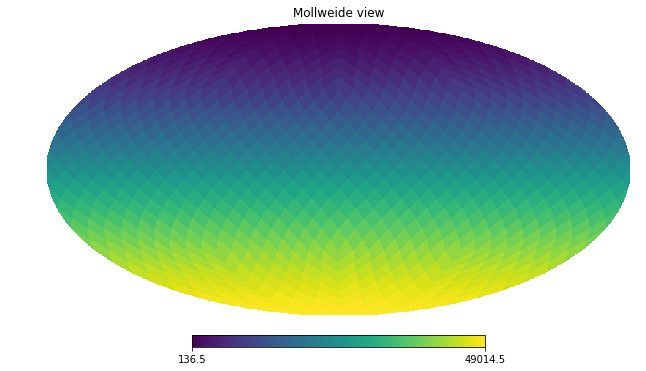

In [4]:
mtensor = m.reshape(1, len(m), 1)
out = model.predict(mtensor)
out = out.reshape(hp.nside2npix(8))
hp.mollview(out)

## MaxPooling

In [5]:
inputs = keras.layers.Input((len(m), 1))
x = nnhealpix.layers.MaxPooling(input_nside, output_nside)(inputs)
model = keras.models.Model(inputs=inputs, outputs=x)
model.compile(loss=keras.losses.mse,
              optimizer=keras.optimizers.SGD(lr=0.01))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 49152, 1)          0         
_________________________________________________________________
order_map_2 (OrderMap)       (None, 49152, 1)          0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 768, 1)            0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


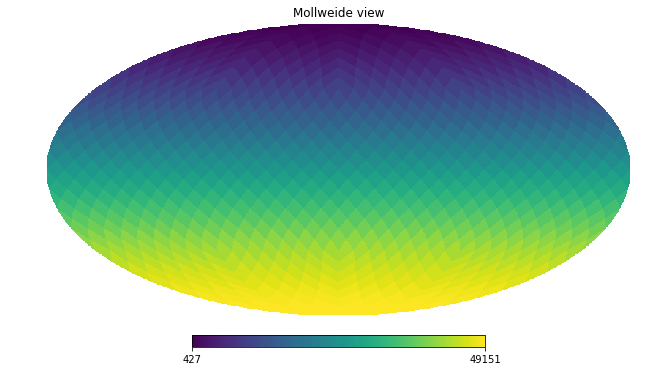

In [6]:
mtensor = m.reshape(1, len(m), 1)
out = model.predict(mtensor)
out = out.reshape(hp.nside2npix(output_nside))
hp.mollview(out)

## ConvPixel

In [7]:
mtensor = m.reshape(1, len(m), 1)
inputs = keras.layers.Input((len(m), 1))
x = nnhealpix.layers.ConvPixel(input_nside, output_nside, filters=1)(inputs)
model = keras.models.Model(inputs=inputs, outputs=x)
model.compile(loss=keras.losses.mse,
              optimizer=keras.optimizers.SGD(lr=0.01))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 49152, 1)          0         
_________________________________________________________________
order_map_3 (OrderMap)       (None, 49152, 1)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 768, 1)            64        
Total params: 64
Trainable params: 64
Non-trainable params: 0
_________________________________________________________________


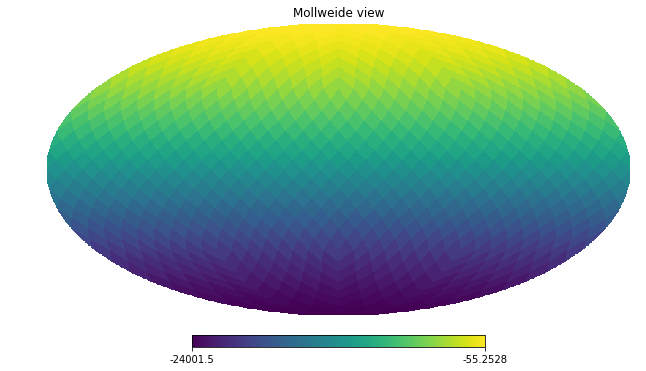

In [8]:
mtensor = m.reshape(1, len(m), 1)
out = model.predict(mtensor)
out = out.reshape(hp.nside2npix(output_nside))
hp.mollview(out)

## ConvNeighbours

In [9]:
mtensor = m.reshape(1, len(m), 1)
inputs = keras.layers.Input((len(m), 1))
x = nnhealpix.layers.ConvNeighbours(input_nside, filters=32, kernel_size=9)(inputs)
model = keras.models.Model(inputs=inputs, outputs=x)
model.compile(loss=keras.losses.mse,
              optimizer=keras.optimizers.SGD(lr=0.01))
model.summary()
out = model.predict(mtensor)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 49152, 1)          0         
_________________________________________________________________
order_map_4 (OrderMap)       (None, 442368, 1)         0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 49152, 32)         288       
Total params: 288
Trainable params: 288
Non-trainable params: 0
_________________________________________________________________
